<a href="https://colab.research.google.com/github/RISHIshrivas/BharatIntern_Rishi-Shrivas/blob/main/Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [94]:
import pandas as pd
df = pd.read_csv('house price.csv')

In [95]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [96]:
df.head

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [97]:
df.info

<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  c

In [98]:
dataprice=df[df['price'] >= 20000]
dataprice

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [99]:
dataprice=df[df['price'] < 2565005]['price'].value_counts()

In [100]:
dataprice

0.0         49
300000.0    42
400000.0    31
440000.0    29
450000.0    29
            ..
363990.0     1
427874.0     1
240500.0     1
658588.0     1
220600.0     1
Name: price, Length: 1727, dtype: int64

In [101]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


#Exploratory data Analysis

In [102]:
df.shape

(4600, 18)

In [103]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [105]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [106]:
df.price.value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [107]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [108]:
df.condition.value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

#Data Visualisation

<Axes: xlabel='yr_renovated', ylabel='count'>

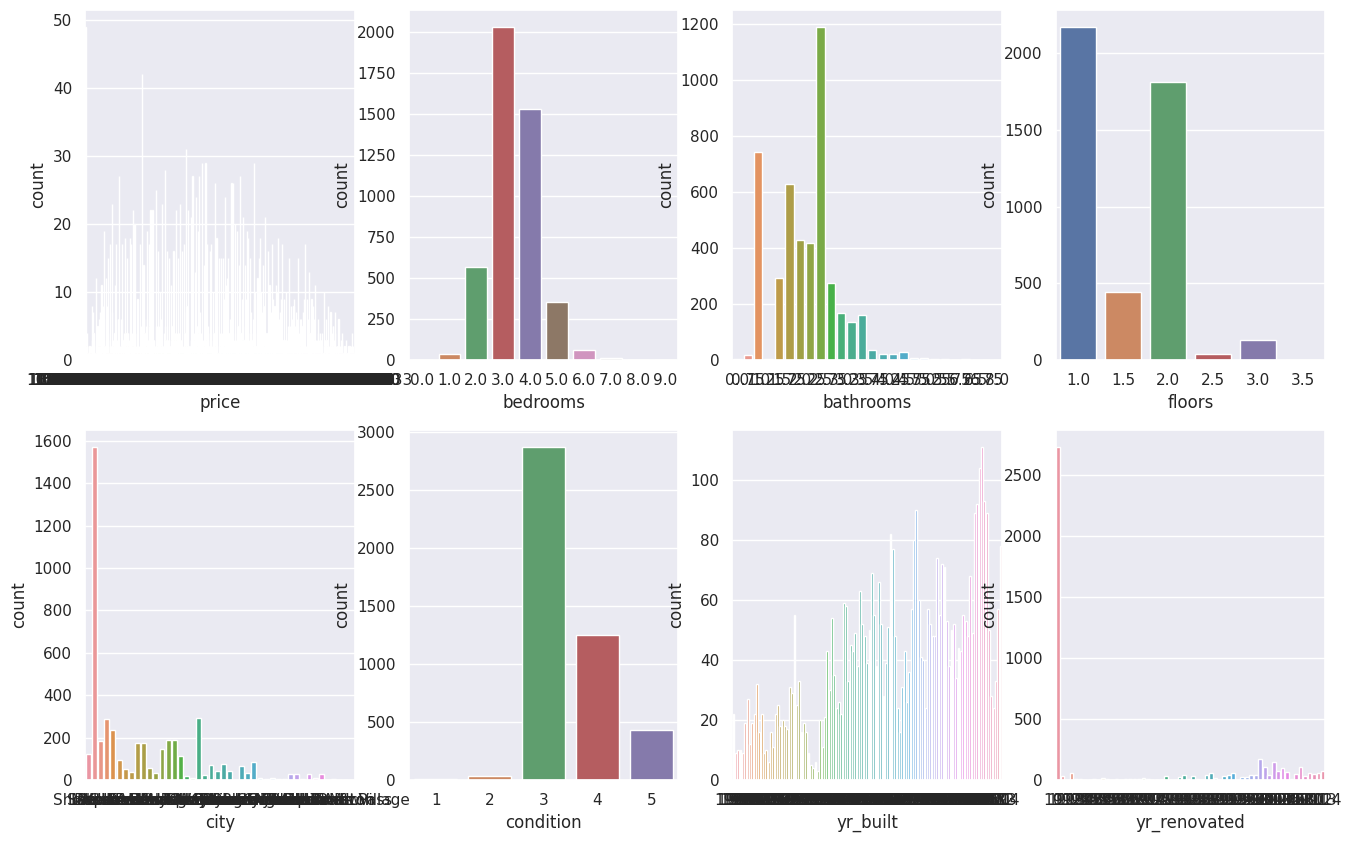

In [109]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='price', data = df, ax=ax[0][0])
sns.countplot(x='bedrooms', data=df, ax=ax[0][1])
sns.countplot(x='bathrooms', data=df, ax=ax[0][2])
sns.countplot(x='floors', data=df, ax=ax[0][3])
sns.countplot(x='city', data=df, ax=ax[1][0])
sns.countplot(x='condition', data=df, ax=ax[1][1])
sns.countplot(x='yr_built', data=df, ax=ax[1][2])
sns.countplot(x='yr_renovated', data=df, ax=ax[1][3])


<Axes: xlabel='city', ylabel='count'>

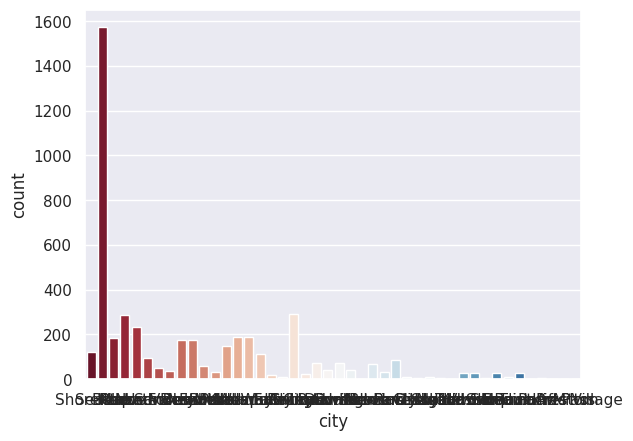

In [110]:
sns.countplot(x="city" , data =df, palette="RdBu")

<Axes: xlabel='price', ylabel='count'>

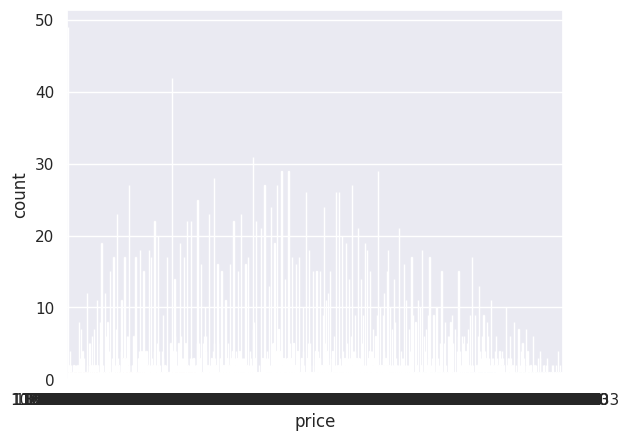

In [111]:
sns.countplot(x="price" , data =df, palette="RdBu")

<Axes: xlabel='condition', ylabel='count'>

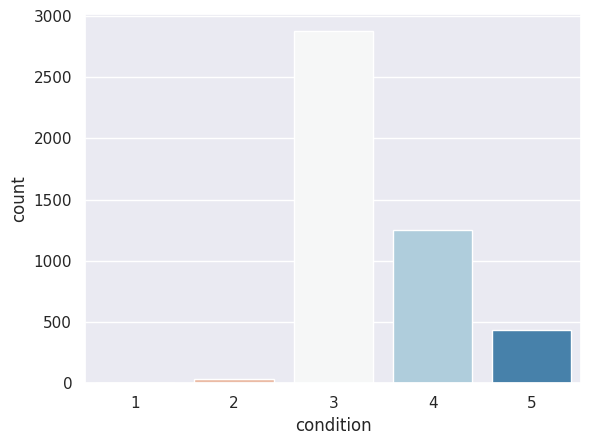

In [112]:
sns.countplot(x="condition" , data =df, palette="RdBu")

<Axes: xlabel='yr_built', ylabel='count'>

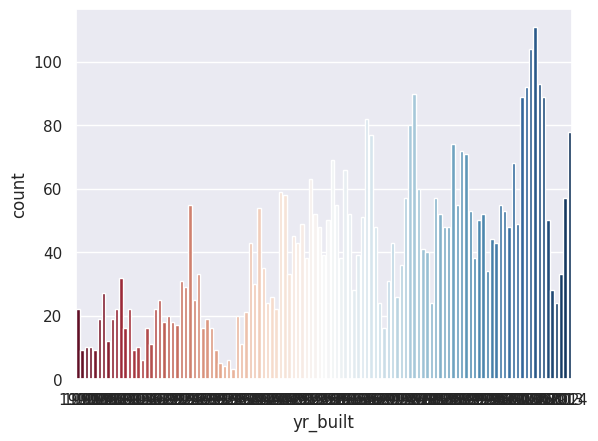

In [113]:
sns.countplot(x="yr_built" , data =df, palette="RdBu")

#**Histrogram Distribution**

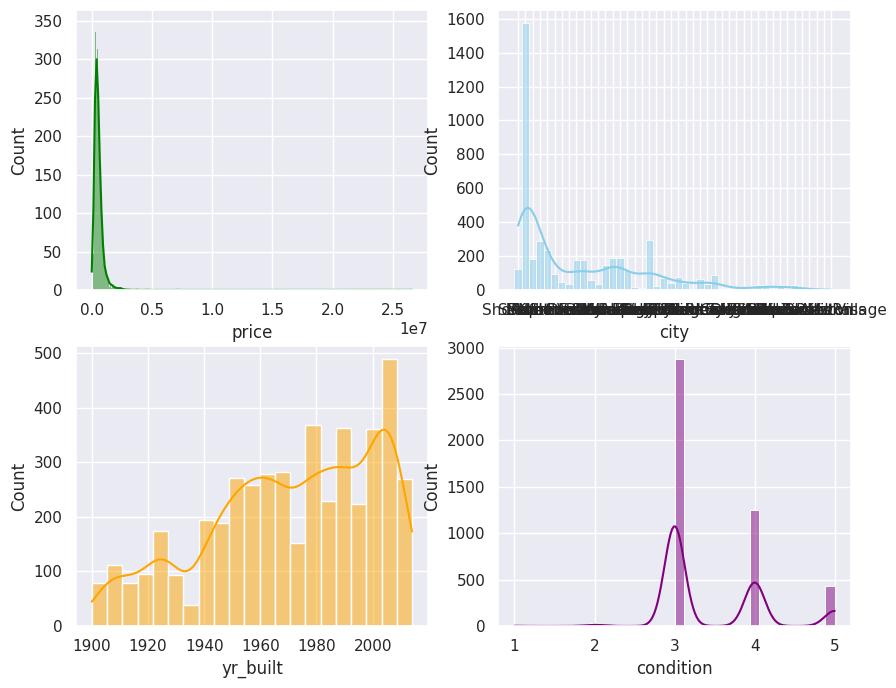

In [114]:
# Distribution numerical variable using the Histogram

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="price", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="city", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="yr_built", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="condition", kde=True, ax=axs[1, 1], color='purple');


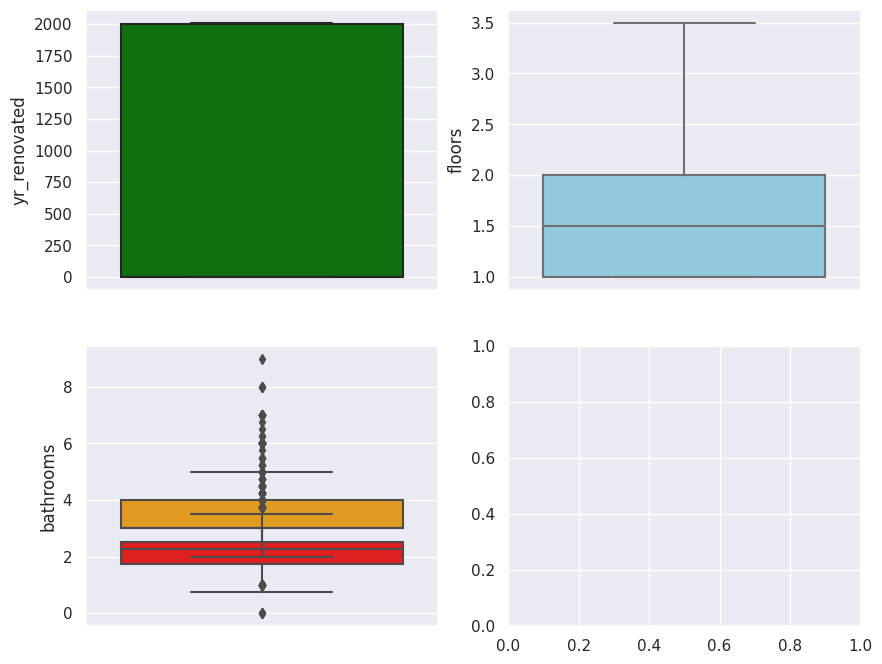

In [115]:
#Box plot using to show outliers

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, y="yr_renovated", ax=axs[0, 0], color='green')
sns.boxplot(data=df, y="floors", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=df, y="bedrooms", ax=axs[1, 0], color='orange')
sns.boxplot(data=df, y="bathrooms", ax=axs[1, 0], color='Red');

<Axes: xlabel='city'>

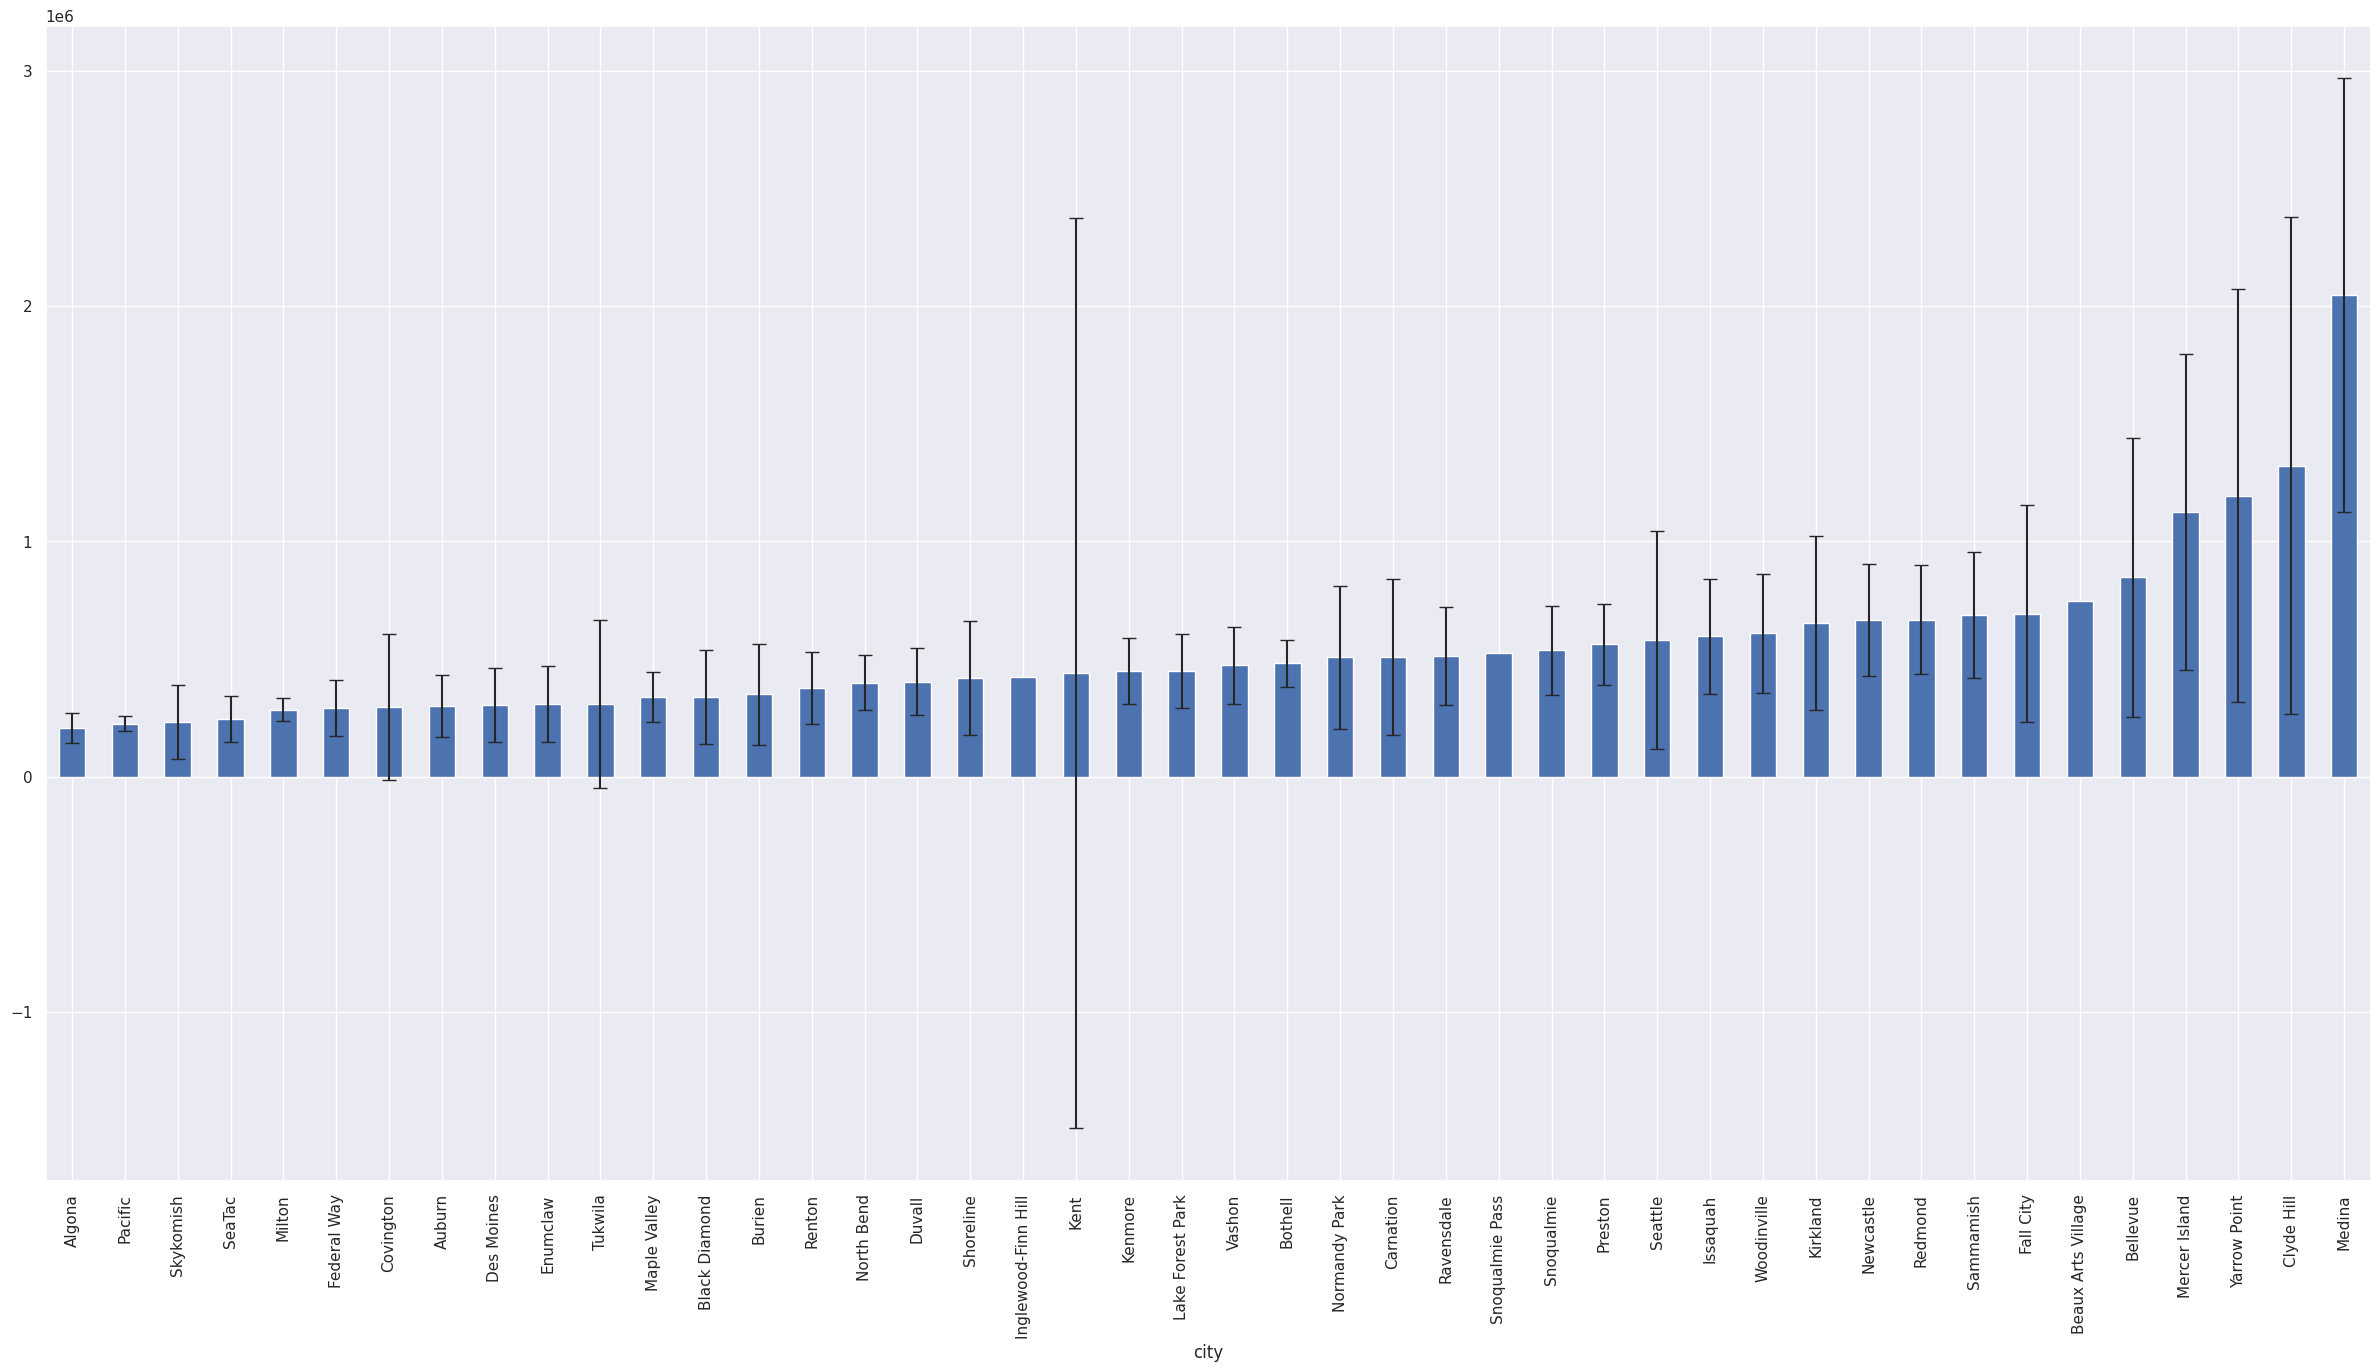

In [116]:
stdvalforcity = df.groupby('city')['price'].std()
df.groupby('city')['price'].mean().sort_values().plot(kind='bar',yerr=stdvalforcity, capsize=5, stacked=True,figsize=(30, 15))

<Axes: xlabel='statezip'>

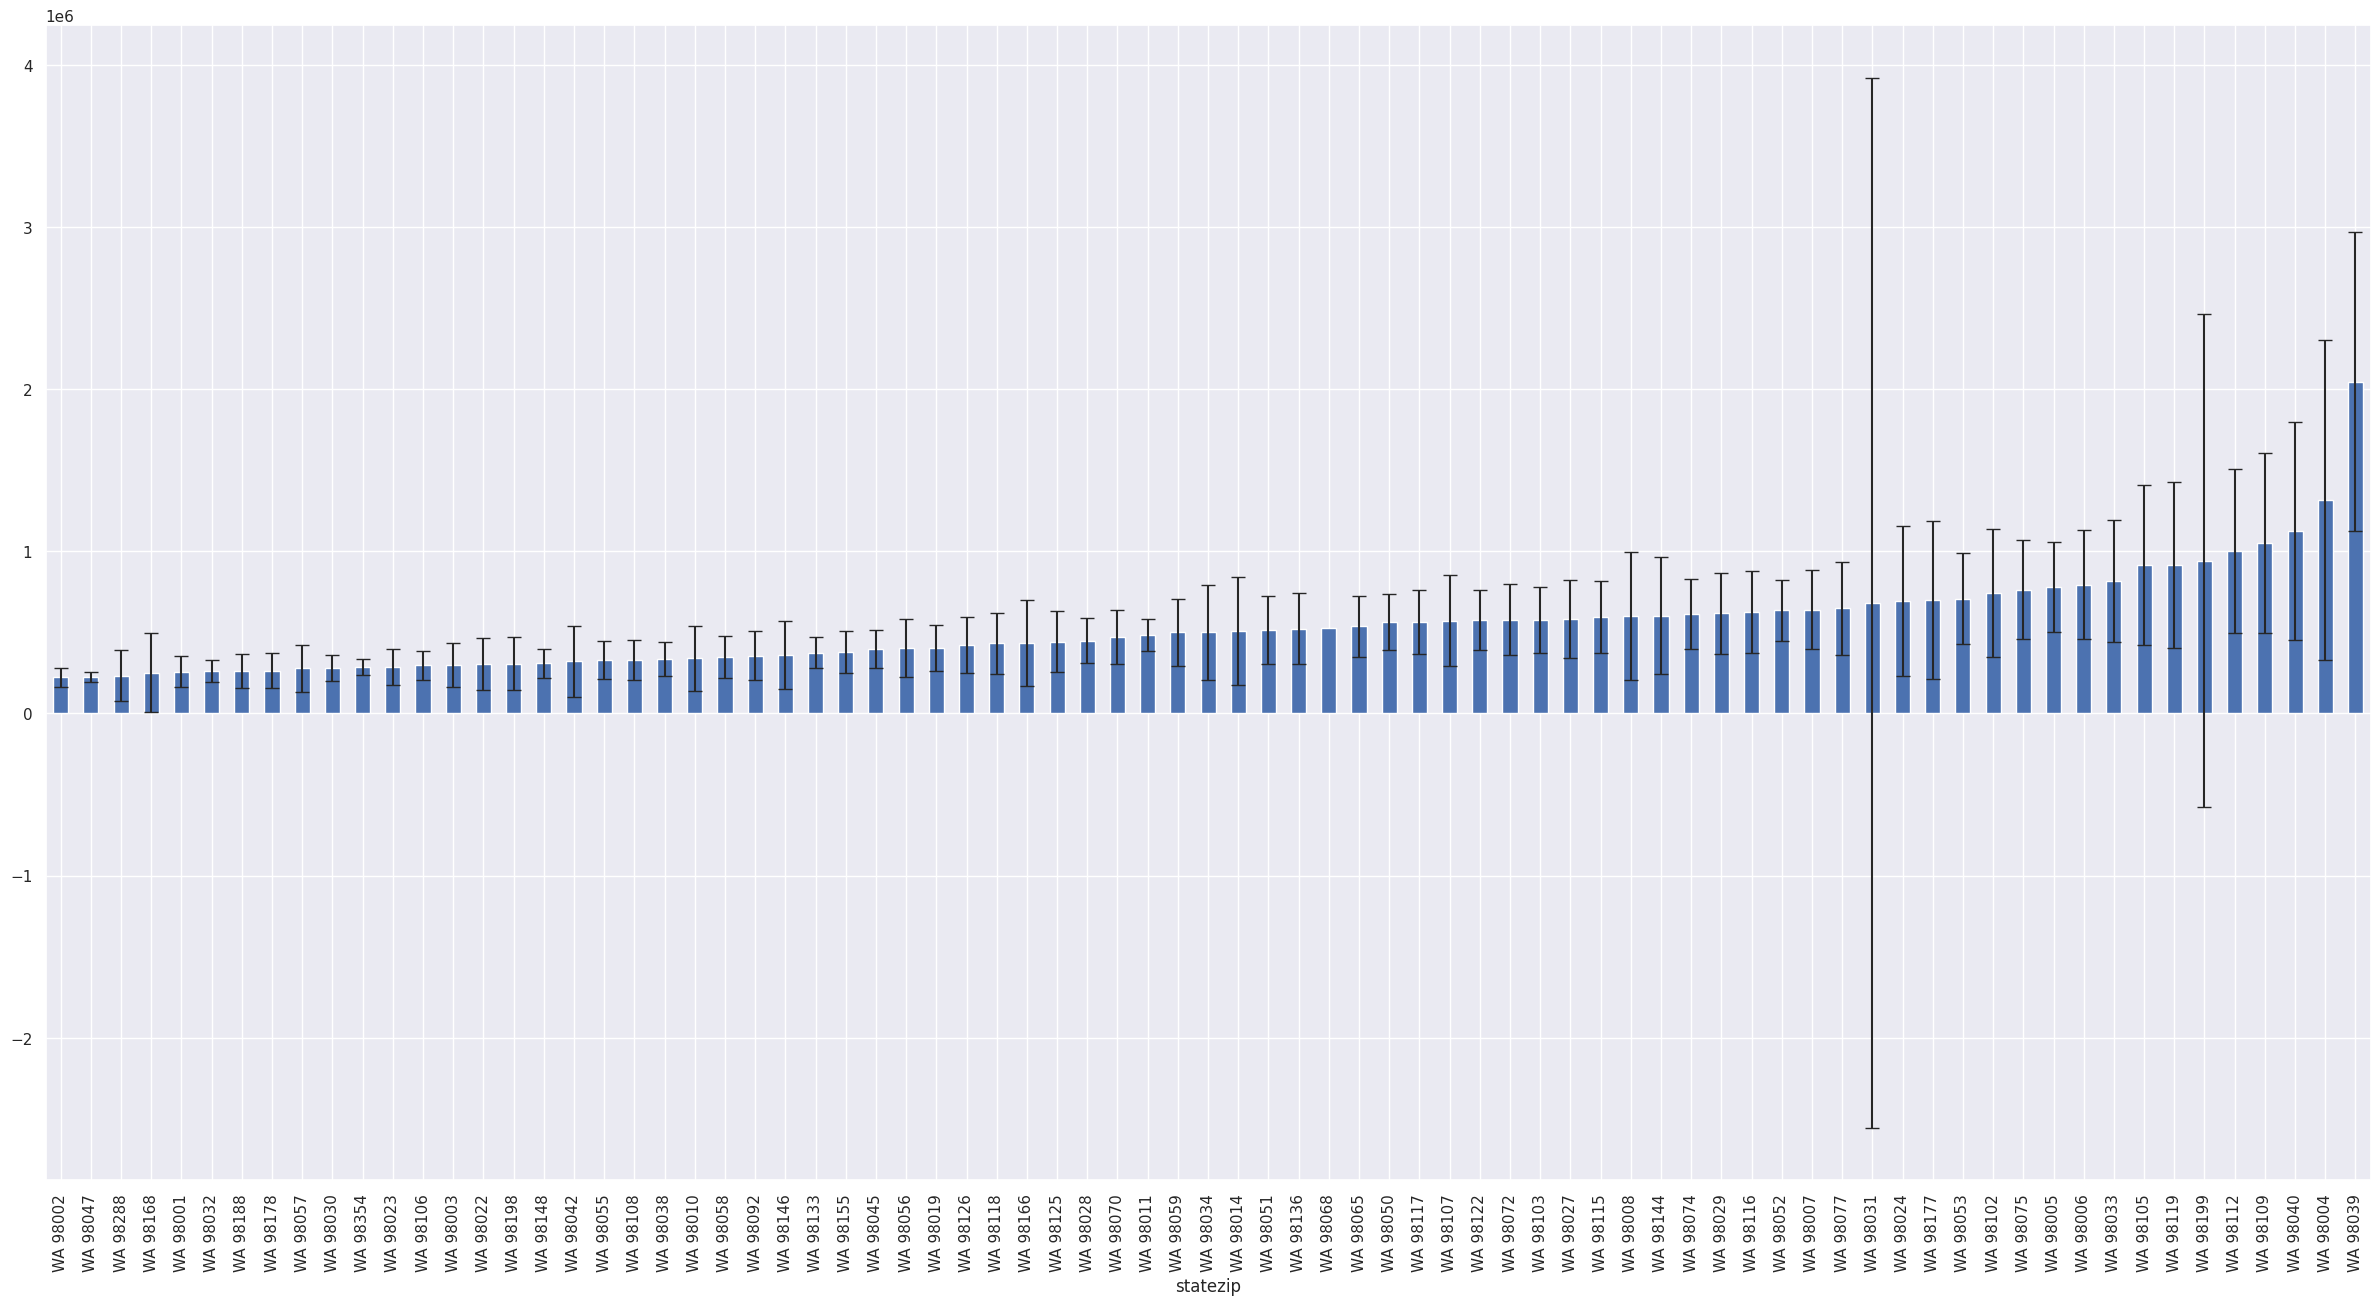

In [117]:
stdvalforcity = df.groupby('statezip')['price'].std()
df.groupby('statezip')['price'].mean().sort_values().plot(kind='bar',yerr=stdvalforcity, capsize=5, stacked=True,figsize=(30, 15))

<ipython-input-118-ba57b0607140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdBu")


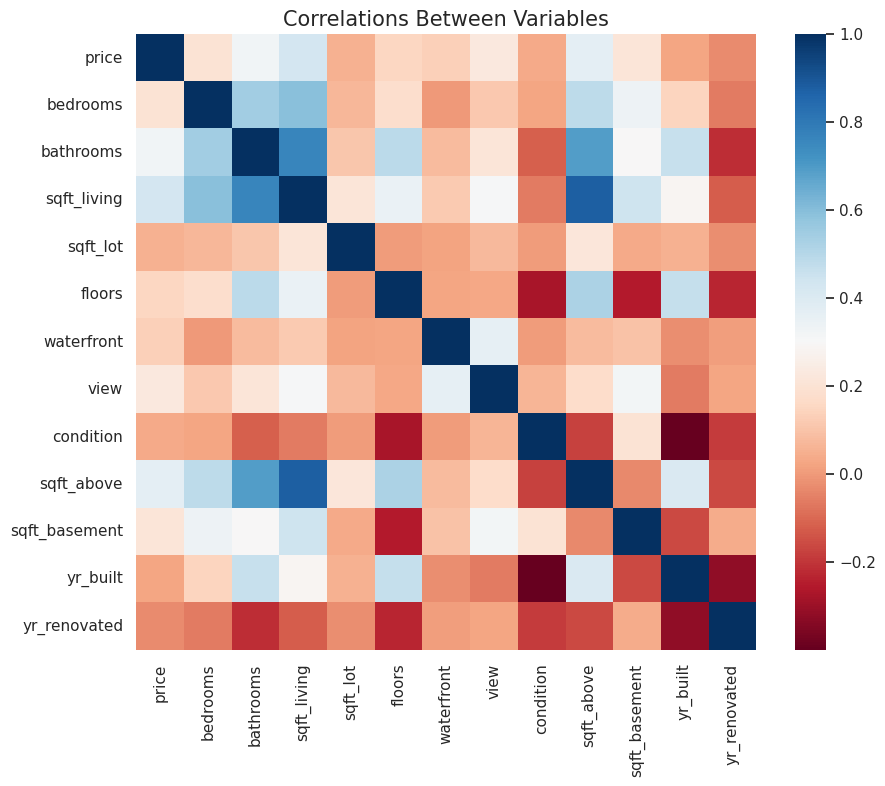

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

#**Label Encoding**

In [119]:
from sklearn.preprocessing import LabelEncoder
df['city']=LabelEncoder().fit_transform(df['city'])
df['condition']=LabelEncoder().fit_transform(df['condition'])


In [120]:
lab_end = LabelEncoder()

In [121]:
columns =["price","bedrooms","bathrooms","sqft_living", "sqft_lot","floors","waterfront","view","condition","sqft_above","sqft_basement" , "yr_built" ,"yr_renovated","street","city","statezip","country"]

df[columns] = df[columns].apply(lab_end.fit_transform)

In [122]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,402,3,4,93,1399,1,0,0,2,96,0,55,50,1522,36,62,0
1,2014-05-02 00:00:00,1719,5,8,406,1701,2,0,4,4,373,29,21,0,3899,35,58,0
2,2014-05-02 00:00:00,487,3,6,180,2196,0,0,0,3,182,0,66,0,2291,18,26,0
3,2014-05-02 00:00:00,706,3,7,191,1439,0,0,0,3,52,109,63,0,4263,3,7,0
4,2014-05-02 00:00:00,998,4,8,181,2026,0,0,0,3,70,85,76,37,4352,31,31,0


#**Train and Test Split**

In [123]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#**Build Machine Learning Model**

In [124]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [125]:
model = lgbm.LGBMRegressor()

In [126]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [127]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume you have your features (X) and labels (y) ready
# X: Features, y: Labels

# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Create a KFold object with k=5 (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a variable to store the overall accuracy
overall_accuracy = 0

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for this fold: {fold_accuracy:.2f}")

    # Accumulate the accuracy for overall evaluation
    overall_accuracy += fold_accuracy

# Calculate the average accuracy across all folds
average_accuracy = overall_accuracy / kf.get_n_splits()
print(f"\nAverage Accuracy across all folds: {average_accuracy:.2f}")

Accuracy for this fold: 1.00
Accuracy for this fold: 0.97
Accuracy for this fold: 0.93
Accuracy for this fold: 0.93
Accuracy for this fold: 0.97

Average Accuracy across all folds: 0.96


In [128]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [129]:
def create_numeric_feature(input_df):
    use_columns = df_columns
    return input_df[use_columns].copy()

In [130]:
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [131]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [133]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv,
             params: dict=None,
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv):
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)

        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train,
                    eval_set=[(x_valid, y_valid)],
                    early_stopping_rounds=100,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [134]:
y = df
print(y.shape)
print(type(y))

(4600, 18)
<class 'pandas.core.frame.DataFrame'>


In [135]:
ydf=pd.DataFrame(y)
ydf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,402,3,4,93,1399,1,0,0,2,96,0,55,50,1522,36,62,0
1,2014-05-02 00:00:00,1719,5,8,406,1701,2,0,4,4,373,29,21,0,3899,35,58,0
2,2014-05-02 00:00:00,487,3,6,180,2196,0,0,0,3,182,0,66,0,2291,18,26,0
3,2014-05-02 00:00:00,706,3,7,191,1439,0,0,0,3,52,109,63,0,4263,3,7,0
4,2014-05-02 00:00:00,998,4,8,181,2026,0,0,0,3,70,85,76,37,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,384,3,5,124,1000,0,0,0,3,126,0,54,24,3447,35,62,0
4596,2014-07-09 00:00:00,961,3,8,115,1306,2,0,0,2,118,0,83,54,960,3,6,0
4597,2014-07-09 00:00:00,695,3,8,333,1140,2,0,0,2,333,0,109,0,4033,32,37,0
4598,2014-07-10 00:00:00,110,4,6,207,1055,0,0,0,2,60,111,74,0,3498,35,71,0


In [136]:
Name=sorted(df['price'].unique().tolist())
print(Name)
print(len(Name))
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))
df['Class']=df['price'].map(normal_mapping)
print(normal_mapping)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [137]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df],
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')

    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()

    return fig,ax